# Exploratory Data Analysis (EDA) for Bank Marketing Dataset

This notebook performs exploratory data analysis on the Bank Marketing Dataset to better understand the data, identify patterns, and prepare for hypothesis testing and machine learning modelling.
I will use the cleaned + feature-engineered dataset for human-readable plots and the ML-ready dataset for numerical summaries and correlations.

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

In [ ]:
# --- Load datasets ---

# Cleaned + feature-engineered version (for readable categorical plots)
df_clean = pd.read_csv("../data/cleaned_bank.csv")
# ML-ready version (for numerical summaries and correlations)
df_ml = pd.read_csv("../data/ml_ready_bank.csv")



print("Cleaned dataset shape:", df_clean.shape)
print("ML-ready dataset shape:", df_ml.shape)

df_clean.head()

Cleaned dataset shape: (11162, 17)
ML-ready dataset shape: (11162, 66)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 1. Descriptive Statistics
I start by looking at summary statistics for the numerical variables in my ML-ready dataset.
This gives me a quick overview of the data’s central tendency (mean, median) and spread (std, min, max), and helps me spot potential outliers.


In [5]:
df_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
y,11162.0,4.738398e-01,0.499338,0.000000,0.000000,0.000000,1.000000,1.000000
age,11162.0,2.622681e-16,1.000045,-1.950161,-0.774958,-0.187357,0.652074,4.513455
balance,11162.0,2.546292e-17,1.000045,-2.596850,-0.436100,-0.303398,0.055642,24.703510
housing,11162.0,0.000000e+00,1.000045,-0.947616,-0.947616,-0.947616,1.055280,1.055280
loan,11162.0,-2.037033e-17,1.000045,-0.387923,-0.387923,-0.387923,-0.387923,2.577830
...,...,...,...,...,...,...,...,...
pdays_bucket_31–90d,11162.0,2.445798e-02,0.154473,0.000000,0.000000,0.000000,0.000000,1.000000
pdays_bucket_8–30d,11162.0,3.046049e-03,0.055109,0.000000,0.000000,0.000000,0.000000,1.000000
pdays_bucket_>90d,11162.0,2.247805e-01,0.417456,0.000000,0.000000,0.000000,0.000000,1.000000
pdays_bucket_never,11162.0,7.457445e-01,0.435461,0.000000,0.000000,1.000000,1.000000,1.000000


My interpretation:

I check for extreme values in features like balance, duration, and campaign to see if scaling or transformation might be needed.

If the standard deviation is much higher than the mean, that could suggest skewness in the data.

## 2. Visualisation 1 — Distribution of Age
I plot a histogram of the clients’ ages.
This lets me see the most common age groups and whether the distribution is skewed.

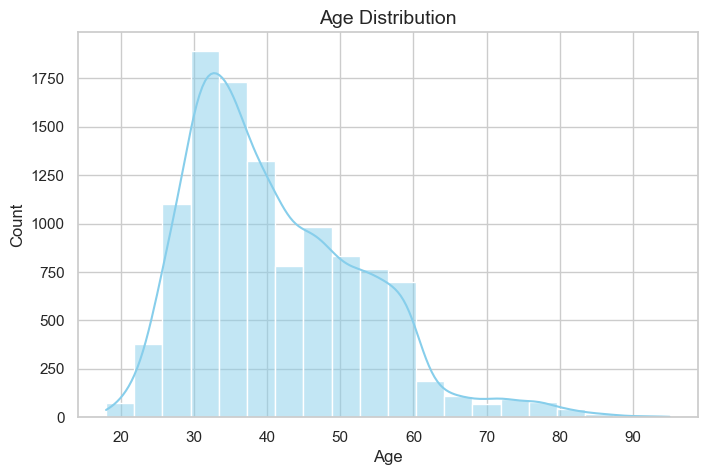

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

My interpretation:

I look for which age ranges have the highest frequency.

If younger or older groups are under-represented, I note that there could be bias in predictions.

## 3. Visualisation 2 — Term Deposit Subscription by Job Type
Next, I plot the proportion of clients who subscribed to a term deposit (deposit = yes) for each job category.
This helps me see which job groups are more likely to subscribe.

/var/folders/09/yd5kcn1539g31p80cnw4dmr80000gn/T/ipykernel_5331/4068494168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


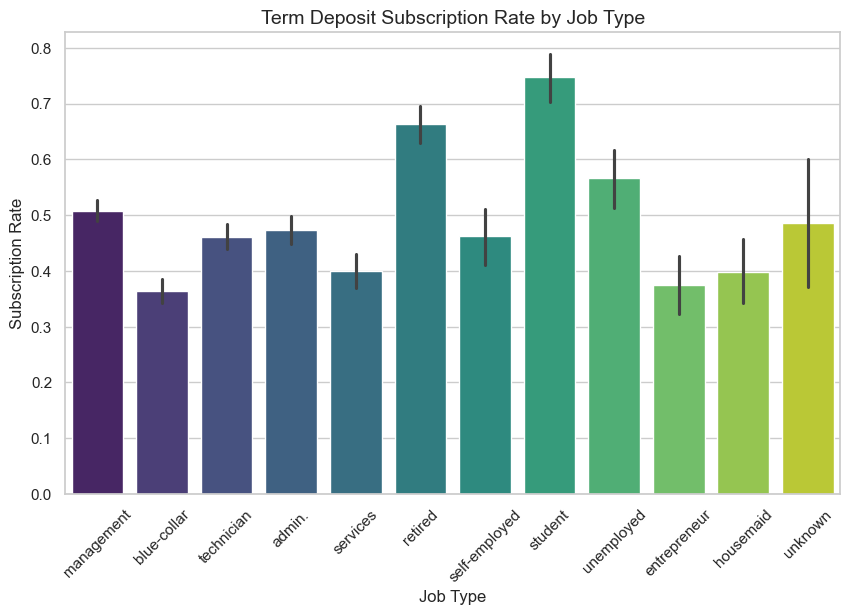

In [7]:
plt.figure(figsize=(10,6))
job_order = df_clean['job'].value_counts().index
sns.barplot(
    data=df_clean,
    x='job',
    y=df_clean['deposit'].map({'yes':1,'no':0}),
    order=job_order,
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title('Term Deposit Subscription Rate by Job Type', fontsize=14)
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.show()

My interpretation:

I check which job categories have the highest subscription rates (e.g., retirees, students, admin).

Job groups with low subscription rates might need different marketing approaches.

## 4. Visualisation 3 — Correlation Heatmap (Numerical Features)
Finally, I plot a heatmap to check correlations between numerical features in my ML-ready dataset.
This helps me find relationships that could be useful in my modelling and also spot multicollinearity.

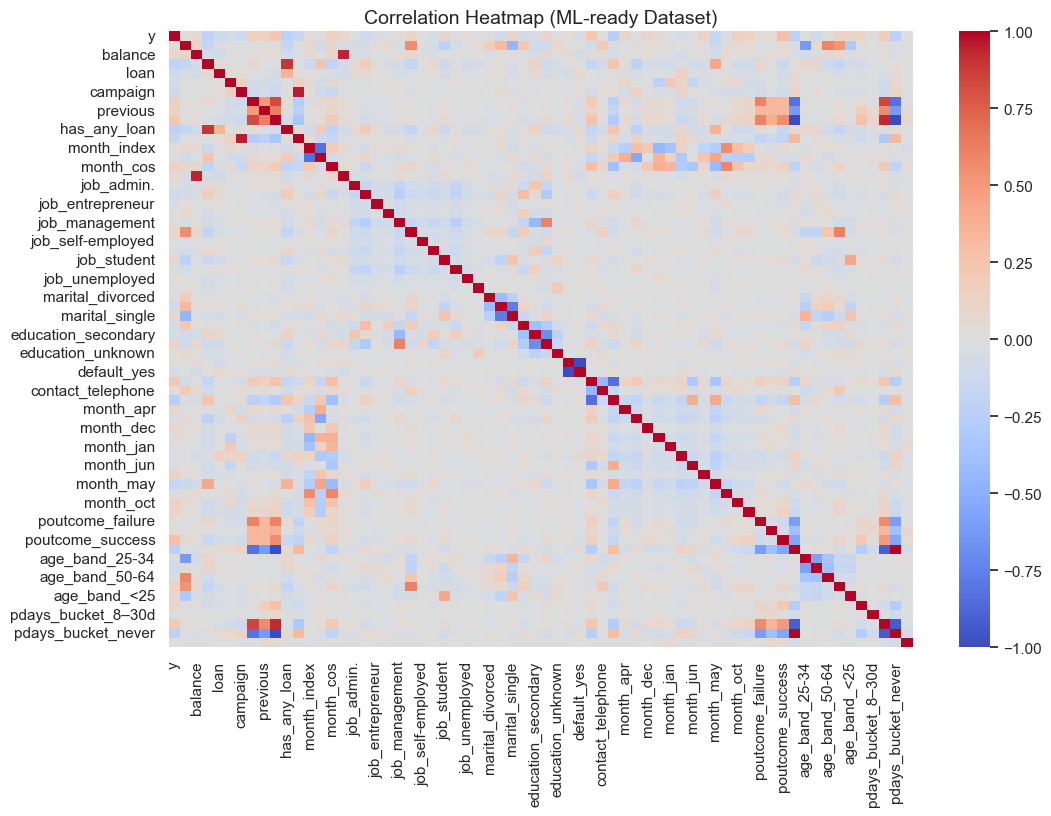

In [8]:
plt.figure(figsize=(12,8))
corr = df_ml.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (ML-ready Dataset)', fontsize=14)
plt.show()

My interpretation:

I look for strong positive or negative correlations with the target variable y.

Strong correlations between independent variables tell me where multicollinearity might be a problem for certain models.

## EDA Summary

My Exploratory Data Analysis focused on identifying patterns in customer demographics, contact methods, and term deposit subscription outcomes. I found that subscription rates varied notably across job types, with retired and student customers showing the highest proportions, while blue-collar and services were lower. Age analysis revealed higher uptake among middle-aged (35–49) and older (50–64) customers compared to younger groups. Contact method stood out as a strong factor — customers contacted via cellular were much more likely to subscribe than those reached via telephone. These early findings guided my hypothesis testing phase, where I statistically validated these observed relationships.

Insights:

Job type, age, and contact method appear influential in subscription outcomes.

Older and retired customers are more responsive to campaigns.

Cellular outreach shows stronger performance than telephone contact.

References:
OpenAI. (2025). ChatGPT. https://chat.openai.com
GitHub. (2025). GitHub Copilot. https://github.com/features/copilot